In [1]:
import assessmentModule as amod
import glob
import matplotlib.pyplot as plt
import numpy as np
import operator
import os
import pandas as pd
import scipy.signal as ss
%matplotlib inline

In [2]:
def smooth(x, n):
    """Return moving average for period n."""
    w = np.ones((n, )) / n
    return np.convolve(x, w, mode='valid')

In [3]:
home_dir = '/Users/todd/code'
data_dir = os.path.join(home_dir,
                        'AnalysisTools/DataScience/blog/smo2_hr_lead_lag')
os.chdir(data_dir)

In [4]:
column_names = ['c0', 'c1', 'c2', 'c3', 'ts',
                'c5', 'c6', 'HR', 'c8', 'c9',
                'SmO2', 'c11', 'c12', 'power', 'c14']

In [5]:
adam_quad_data = pd.read_csv('adam_alter_left_quad.csv',
                             skiprows=5, names=column_names)
adam_calf_data = pd.read_csv('adam_alter_left_calf.csv',
                             skiprows=5, names=column_names)

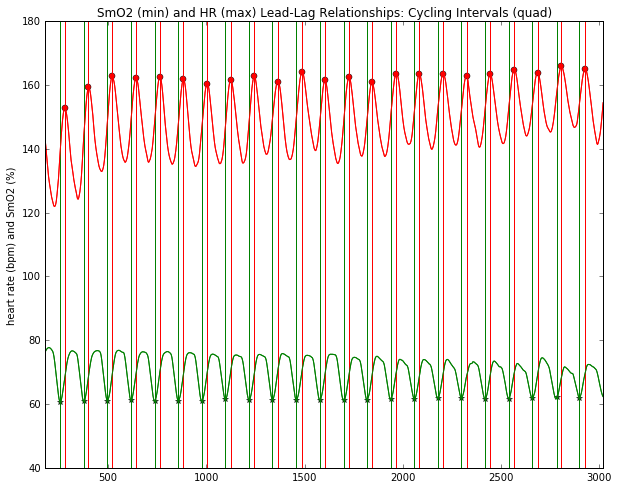

In [7]:
start_idx = 180
end_idx = 3200

smoothed_smo2_data = smooth(adam_quad_data.SmO2, 30)[start_idx:end_idx]
smoothed_hr_data = smooth(adam_calf_data.HR, 30)[start_idx:end_idx]

smo2_min_idx = ss.argrelmin(smoothed_smo2_data, order=30)[0]
smo2_min_idx = np.append(smo2_min_idx, 375)
smo2_min_idx = np.append(smo2_min_idx, 2786)
smo2_min_idx.sort()
smo2_min_vals = smoothed_smo2_data[smo2_min_idx]

hr_max_idx = ss.argrelmax(smoothed_hr_data, order=30)[0]
hr_max_idx = np.append(hr_max_idx, 399)
hr_max_idx = np.append(hr_max_idx, 641)
hr_max_idx = np.append(hr_max_idx, 762)
hr_max_idx = np.append(hr_max_idx, 883)
hr_max_idx = np.append(hr_max_idx, 1363)
hr_max_idx = np.append(hr_max_idx, 1726)
hr_max_idx = np.append(hr_max_idx, 1966)
hr_max_idx = np.append(hr_max_idx, 2083)
hr_max_idx = np.append(hr_max_idx, 2443)
hr_max_idx = np.append(hr_max_idx, 2566)
hr_max_idx = np.append(hr_max_idx, 2806)
hr_max_idx.sort()
hr_max_vals = smoothed_hr_data[hr_max_idx]

plt.plot(smo2_min_idx, 
         smo2_min_vals,
         linestyle='None',
         marker='*',
         color='green')

plt.plot(hr_max_idx, 
         hr_max_vals,
         linestyle='None',
         marker='o',
         color='red')

plt.plot(smoothed_smo2_data, color='green')
plt.plot(smoothed_hr_data, color='red')

for i in hr_max_idx:
    plt.axvline(i, color='red')
    
for i in smo2_min_idx:
    plt.axvline(i, color='green')

plt.title('SmO2 (min) and HR (max) Lead-Lag Relationships: Cycling Intervals (quad)')
plt.ylabel('heart rate (bpm) and SmO2 (%)')

plt.xlim(180, 3020)
#plt.xticks(np.arange(270, 1620, 180))
plt.rcParams['figure.figsize'] = 10, 8
plt.plot(smoothed_smo2_data, color='green')
plt.plot(smoothed_hr_data, color='red')
#plt.show()
plt.savefig('SmO2-min_HR-max_Lead-Lag-Cycling-Intervals-Quad.png')

In [8]:
spacing_smo2_min_hr_max = list(map(operator.sub, hr_max_idx, smo2_min_idx))

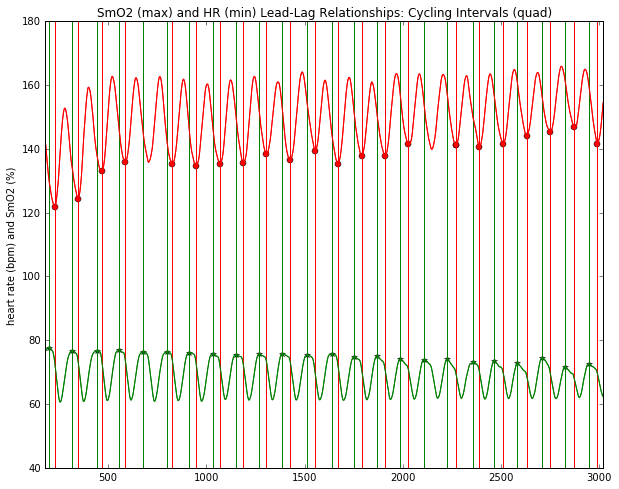

In [9]:
start_idx = 180
end_idx = 3200

smoothed_smo2_data = smooth(adam_quad_data.SmO2, 30)[start_idx:end_idx]
smoothed_hr_data = smooth(adam_calf_data.HR, 30)[start_idx:end_idx]

smo2_max_idx = ss.argrelmax(smoothed_smo2_data, order=30)[0]
smo2_max_idx = np.append(smo2_max_idx, 317)
smo2_max_idx = np.append(smo2_max_idx, 1152)
smo2_max_idx = np.append(smo2_max_idx, 1752)
smo2_max_idx = np.append(smo2_max_idx, 2107)
smo2_max_idx = np.append(smo2_max_idx, 2709)
smo2_max_idx.sort()
smo2_max_vals = smoothed_smo2_data[smo2_max_idx]

hr_min_idx = ss.argrelmin(smoothed_hr_data, order=30)[0]
hr_min_idx = np.append(hr_min_idx, 466)
hr_min_idx = np.append(hr_min_idx, 586)
hr_min_idx = np.append(hr_min_idx, 1068)
hr_min_idx = np.append(hr_min_idx, 1185)
hr_min_idx = np.append(hr_min_idx, 1305)
hr_min_idx = np.append(hr_min_idx, 1423)
hr_min_idx = np.append(hr_min_idx, 1555)
hr_min_idx = np.append(hr_min_idx, 1668)
hr_min_idx = np.append(hr_min_idx, 2028)
hr_min_idx = np.append(hr_min_idx, 2269)
hr_min_idx = np.append(hr_min_idx, 2389)
hr_min_idx = np.append(hr_min_idx, 2509)
hr_min_idx = np.append(hr_min_idx, 2629)
hr_min_idx = np.append(hr_min_idx, 2750)
hr_min_idx = np.append(hr_min_idx, 2873)
hr_min_idx.sort()
hr_min_vals = smoothed_hr_data[hr_min_idx]

plt.plot(smo2_max_idx, 
         smo2_max_vals,
         linestyle='None',
         marker='*',
         color='green')

plt.plot(hr_min_idx, 
         hr_min_vals,
         linestyle='None',
         marker='o',
         color='red')

plt.plot(smoothed_smo2_data, color='green')
plt.plot(smoothed_hr_data, color='red')

for i in hr_min_idx:
    plt.axvline(i, color='red')
    
for i in smo2_max_idx:
    plt.axvline(i, color='green')

plt.title('SmO2 (max) and HR (min) Lead-Lag Relationships: Cycling Intervals (quad)')
plt.ylabel('heart rate (bpm) and SmO2 (%)')

plt.xlim(180, 3020)
#plt.xticks(np.arange(270, 1620, 180))
plt.rcParams['figure.figsize'] = 10, 8
plt.plot(smoothed_smo2_data, color='green')
plt.plot(smoothed_hr_data, color='red')
plt.show()
#plt.savefig('SmO2-max_HR-min_Lead-Lag-Cycling-Intervals-Quad.png')

In [133]:
spacing_smo2_max_hr_min = list(map(operator.sub, hr_min_idx, smo2_max_idx))

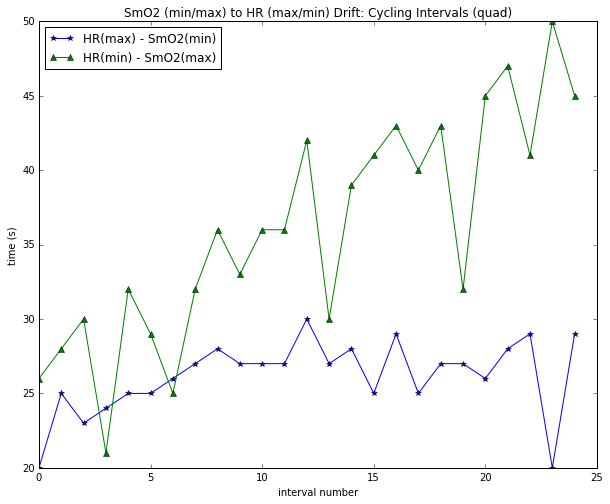

In [135]:
plt.plot(spacing_smo2_min_hr_max,
         marker='*',
         label='HR(max) - SmO2(min)')
plt.plot(spacing_smo2_max_hr_min,
         marker='^',
         label='HR(min) - SmO2(max)')
plt.title('SmO2 (min/max) to HR (max/min) Drift: Cycling Intervals (quad)')
plt.xlabel('interval number')
plt.ylabel('time (s)')
plt.rcParams['legend.loc'] = 'best'
plt.legend()
plt.show()
#plt.savefig('SmO2-min-max_HR-max-min_Drift-Cycling-Intervals-Quad.png')

In [136]:
delta_spacing = list(map(operator.sub, spacing_smo2_max_hr_min, spacing_smo2_min_hr_max))

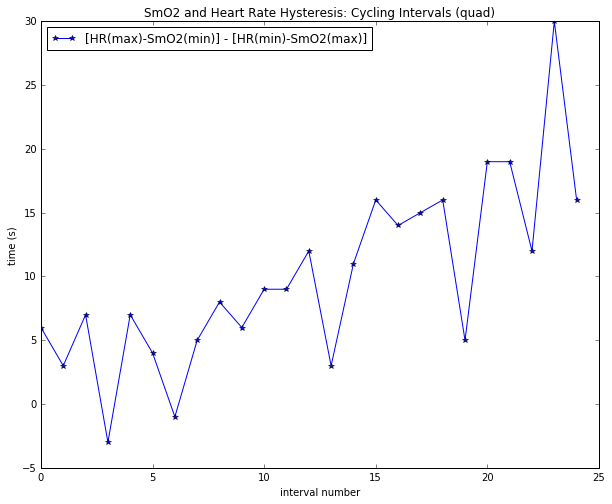

In [137]:
plt.plot(delta_spacing,
         marker='*',
         label='[HR(max)-SmO2(min)] - [HR(min)-SmO2(max)]')
plt.title('SmO2 and Heart Rate Hysteresis: Cycling Intervals (quad)')
plt.xlabel('interval number')
plt.ylabel('time (s)')
plt.rcParams['legend.loc'] = 'best'
plt.legend()
plt.show()
#plt.savefig('SmO2_HR_Hysteresis-Cycling-Intervals-Quad.png')